In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

sns.set(rc = {'figure.figsize': (12,10)})

In [42]:
data = pd.read_csv('titanic_data.csv')
data.head()
data.shape

(891, 12)

Types of features 
- Categorial - Sex , Embarked
- Continuous - Age , Fare
- Discrete - SibSp, Parch 
- Alphanumeric - Cabin 

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Numerical Value Analysis

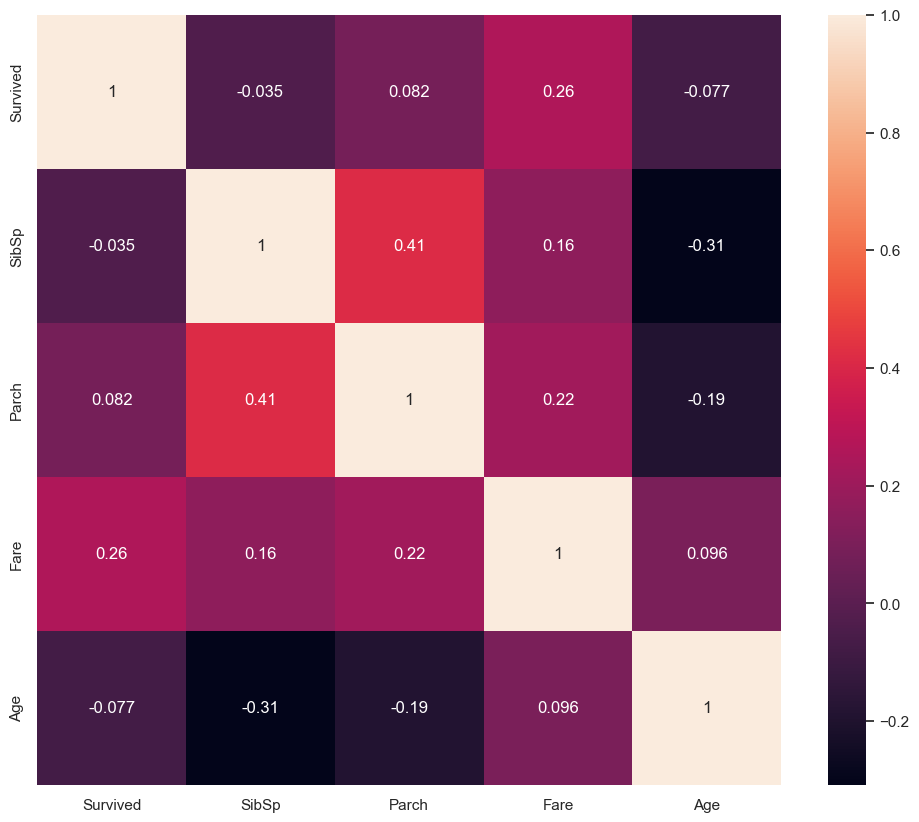

In [29]:
plt.figure(figsize= (12,10))
heatmap = sns.heatmap(data[['Survived','SibSp', 'Parch' ,'Fare',  'Age']].corr(), annot=True )

**Fare has high correlation with Survived**

### SibSp analysis

In [30]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

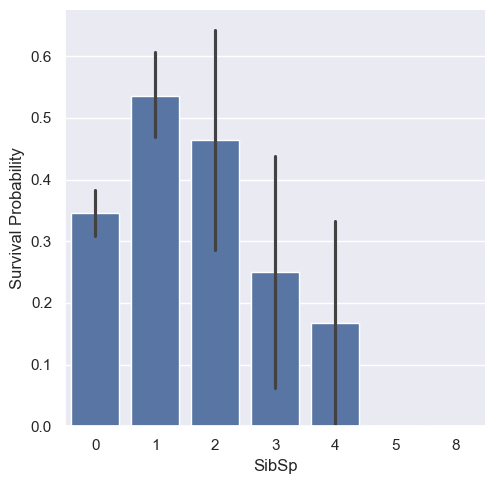

In [31]:
# Visualize the siblings survival 
# set_ylabels() to set the y axis label to the plot 
sns.catplot(x= "SibSp"  , y= "Survived" , data = data, kind ="bar", height = 5 ).set_ylabels("Survival Probability")  #factorplot is same as catplot 

## AGE

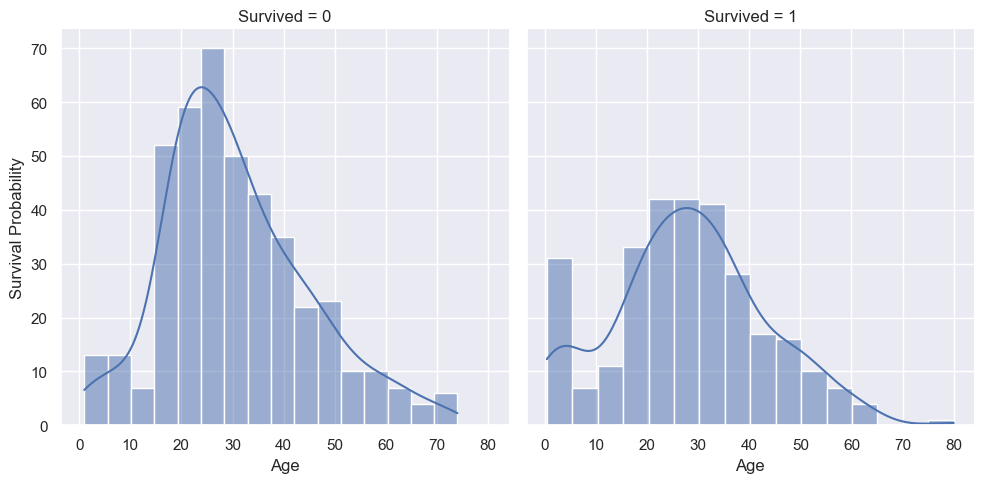

In [32]:
#facetGrid is used to seggregate the graph based on unique value 
age_visual = sns.FacetGrid(data, col="Survived", height= 5)
age_visual = age_visual.map(sns.histplot, "Age", kde = True).set_ylabels("Survival Probability")

 **Young passanger has more chance to survival**

## Sex 

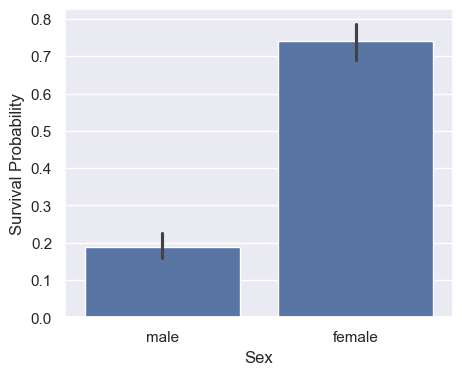

In [41]:
plt.figure(figsize = (5,4))
Sex_plot = sns.barplot(x= "Sex", y = "Survived", data = data).set_ylabel("Survival Probability")

**Female has more chance of survival**

In [34]:
# You can also see in Numerical
data[["Sex", "Survived"]].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


# Pclass

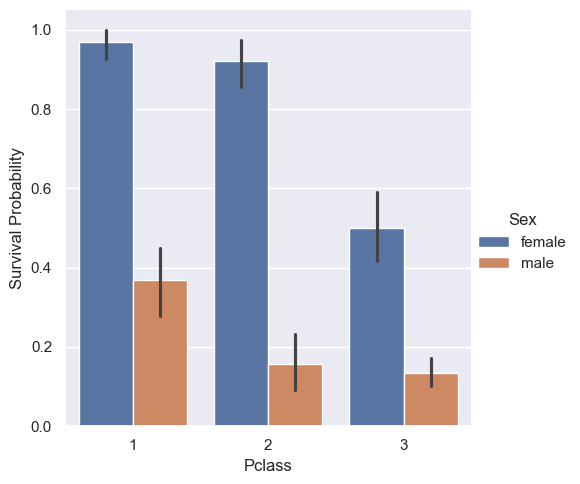

In [43]:
pclass = sns.catplot(x= "Pclass"  , y= "Survived" , data = data, kind ="bar", height = 5 , hue = "Sex") #factorplot is same as catplot 
pclass = pclass.set_ylabels("Survival Probability") 

## Embarked 

In [47]:
data["Embarked"].isnull().sum()

2

In [48]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [49]:
data["Embarked"] = data["Embarked"].fillna("S")

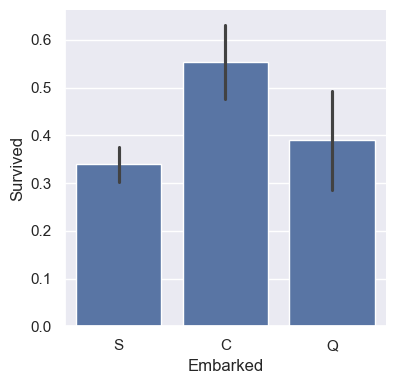

In [54]:
g = sns.catplot(x= "Embarked", y = "Survived", data= data , height = 4, kind = "bar")

## Praparation Of the Dataset 

In [56]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
mean = data["Age"].mean()
std= data["Age"].std()

# check the null Values 
is_null = data["Age"].isnull().sum()

In [62]:
is_null

177

In [66]:
print(mean, std , is_null)

29.69911764705882 14.526497332334042 177


In [96]:
# Generate Random numbers which lies around the disctribution
rand_age = np.random.randint(mean-std, mean+std, size= is_null)

type(rand_age)

numpy.ndarray

In [98]:
# create a dummy variable of Age 
a = data["Age"].copy()

# a[np.isnan(a)]  it will give you the raws where nan is present

# # where ever the null value is present it will fill with a randomn number (which you were created)
 a[np.isnan(a)] = rand_age

# #Asign it back to the original data
data["Age"] = a 

In [100]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [101]:
data["Embarked"] = data["Embarked"].fillna("s")

In [103]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,33.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [107]:
dropping_column = ["PassengerId", "Name", "Ticket", "Cabin"]
data.drop(dropping_column, axis =1 , inplace = True)

In [109]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [110]:
# Assign 0 an 1 to male and female 
genders = {"male":0 , "female" : 1}
data["Sex"] = data["Sex"].map(genders)

In [112]:
# Assign 0 1 2 to the S C Q respectively
ports = {"S": 0, "C" : 1 , "Q": 2}
data["Embarked"] = data["Embarked"].map(ports) 

In [113]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


# Splliting The Data

In [128]:
x = data.drop("Survived", axis =1 )
y = data["Survived"] 

In [159]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x, y , test_size = 0.3, random_state = 0)

# Scaling

In [160]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


# Classifiaction

In [161]:
rfc_classifier = RandomForestClassifier(n_estimators=1000)
lr_classifier = LogisticRegression()
knn_classifier = KNeighborsClassifier(5)
dt_classifier = DecisionTreeClassifier()
rf_classifier = SVC()

In [162]:
# train the DATTA  
rfc_classifier.fit(x_train, y_train)
lr_classifier.fit(x_train, y_train)
knn_classifier.fit(x_train, y_train)
dt_classifier.fit(x_train, y_train)
rf_classifier.fit(x_train, y_train)

SVC()

In [163]:
rfc_classifier_ypred = rfc_classifier.predict(x_test)
lr_classifier_ypred = lr_classifier.predict(x_test)
knn_classifier_ypred = knn_classifier.predict(x_test)
dt_classifier_ypred = dt_classifier.predict(x_test)
rf_classifier_ypred = rf_classifier.predict(x_test)

# Validation

In [164]:
from sklearn.metrics import accuracy_score

rfc_classifier_acc = accuracy_score(y_test, rfc_classifier_ypred)
lr_classifier_acc = accuracy_score(y_test, lr_classifier_ypred)
knn_classifier_acc = accuracy_score(y_test, knn_classifier_ypred)
dt_classifier_acc = accuracy_score(y_test, dt_classifier_ypred)
rf_classifier_acc = accuracy_score(y_test, rf_classifier_ypred)

In [166]:
print("Random Forest        :" , round(rfc_classifier_acc*100,2))
print("Logistic Refression  :" , round(lr_classifier_acc*100,2))
print("KNN                  :" , round(knn_classifier_acc*100,2))
print("Decision Tree        :" , round(dt_classifier_acc*100,2))
print("Random Forest        :" , round(rf_classifier_acc*100,2))

Random Forest        : 82.09
Logistic Refression  : 80.22
KNN                  : 82.84
Decision Tree        : 74.25
Random Forest        : 81.34
